# Getting Genres from Spotify using Spotipy

In [1]:
from nltk import FreqDist #Importing natural language toolkit (nltk) to create word frequency distribution
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pprint
import pandas as pd
import matplotlib.pyplot as plt

client_id = "61fc722b270143c39a95b0d83113b103"
client_secret = "a1b6d905ef364a4b9bd662f136c0892f"


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# I found top 100 for 2017 csv on kaggle
top100_14 = pd.read_csv('billboard2014top100.csv')

# result = sp.search('Thriller',type='track')
# pprint.pprint(result)

top100_14.head()

,№,Title,Artist(s)
0,1,"""Happy""",Pharrell Williams
1,2,"""Dark Horse""",Katy Perry featuring Juicy J
2,3,"""All of Me""",John Legend
3,4,"""Fancy""",Iggy Azalea featuring Charli XCX
4,5,"""Counting Stars""",OneRepublic


In [2]:
songs = []
genres = []
for song in range(0,len(top100_14['Title'])):
    
    #I put this in a try just in case the search result yields an error..or any api request yields an error
    try:
        # I search the song name and artist using spotipy, then I limit the number of search results to 1
         track = sp.search(top100_14['Title'][song] + ' ' + top100_14['Artist(s)'][song],limit=1)
            
            # Here I am parsing the json return to get the artists' id so I can look up the artist
         track_id = track['tracks']['items'][0]['artists'][0]['id']
        # This gets the artists' spotify profile, which includes the genres reflected in their music
         artist = sp.artist(track_id)
         genres.append(artist['genres'])
    except:
        genres.append('n/a')

In [3]:
len(genres)

100

In [4]:
top100_14['genre'] = genres
top100_14.head()

,№,Title,Artist(s),genre
0,1,"""Happy""",Pharrell Williams,"[dance pop, pop, pop rap]"
1,2,"""Dark Horse""",Katy Perry featuring Juicy J,[]
2,3,"""All of Me""",John Legend,"[neo soul, pop, r&b, urban contemporary]"
3,4,"""Fancy""",Iggy Azalea featuring Charli XCX,n/a
4,5,"""Counting Stars""",OneRepublic,"[dance pop, neo mellow, piano rock, pop, pop q..."


In [5]:
allGenres = []
for gen in top100_14['genre']:
    if gen != 'n/a':
        for b in gen:
            allGenres.append(b)
len(allGenres)

266

In [27]:
#I use FreqDist to automatically count the number of times a certain word, in this case genre, appears in the list
genreDist = FreqDist(allGenres)

#This is a plot of the frequency distribution. I believe there is much work to be done in terms of visualization
# but I believe this is a start
#genreDist.plot()
setOfGenres = set(allGenres)
setOfGenres

listOfGenres = list(setOfGenres)
first = listOfGenres[0]
genreDist[first]
df = pd.DataFrame.from_dict(genreDist, orient='index')

genre_count = df.rename_axis('Genre').reset_index().rename(columns={0:'Count'})
genre_count = genre_count.sort_values(by="Count", ascending=False)
genre_count.head()

,Genre,Count
1,pop,45
0,dance pop,31
11,post-teen pop,22
2,pop rap,10
52,contemporary country,10


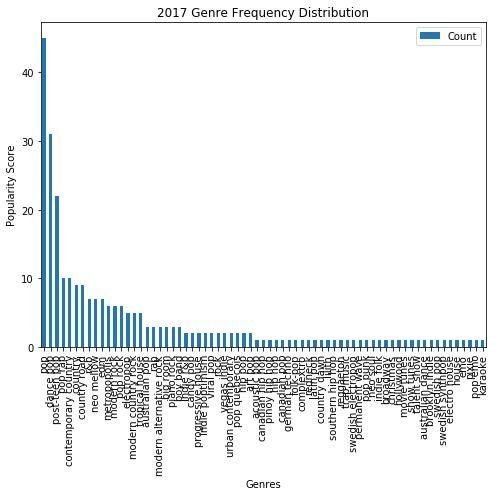

In [29]:
genre_count = genre_count.set_index('Genre')
genre_count.plot(kind='bar', figsize=(7,7), )

genre_count = genre_count.reset_index()
plt.title('2017 Genre Frequency Distribution')
plt.xlabel('Genres')
plt.ylabel('Popularity Score')
plt.tight_layout()
plt.savefig("freqDist2014.png")

In [8]:
genreDist['rap']

3

In [9]:
df = pd.DataFrame.from_dict(genreDist, orient='index')

genres = df.rename_axis('Genres').reset_index().assign(length = df.index.str.len()).rename(columns={0:'Count'})

del genres["length"]
genres

,Genres,Count
0,dance pop,31
1,pop,45
2,pop rap,10
3,neo soul,1
4,r&b,7
5,urban contemporary,2
6,neo mellow,7
7,piano rock,3
8,pop quebecois,2
9,pop rock,6


In [10]:
popCount = 0
rapCount = 0
edmCount = 0
misCount = 0
for genre in allGenres:
   if 'pop' in genre:
       popCount = popCount + 1
   elif('rap' or 'hip hop' or 'trap') in genre:
       rapCount = rapCount + 1
   elif('edm' or 'electro' or 'techno') in genre:
       edmCount = edmCount + 1
   else:
       misCount = misCount + 1

condensedGenre = ['Pop','Rap/Hip-Hop','EDM','Misc.']
summarizedGenres = pd.DataFrame({"Genre":condensedGenre, "Count":[popCount,rapCount,edmCount,misCount]})

summarizedGenres = summarizedGenres.set_index("Genre")
summarizedGenres

,Count
Genre,
Pop,149
Rap/Hip-Hop,4
EDM,7
Misc.,106


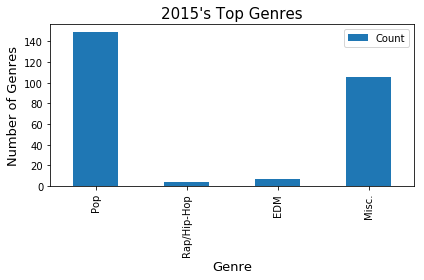

In [33]:
summarizedGenres.plot(kind='bar')
plt.xlabel("Genre", fontsize=13)
plt.ylabel("Number of Genres", fontsize=13)
plt.title("2015's Top Genres", fontsize=15)
plt.tight_layout()
plt.savefig("2014's Top Genres.png")

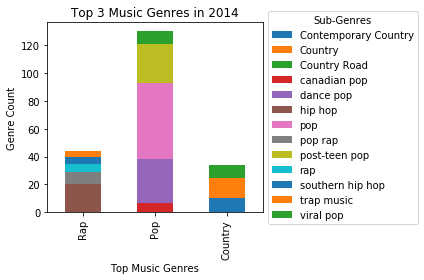

In [34]:
sum = [['Pop','pop', 55],
        ['Pop','dance pop', 31],
        ['Pop','post-teen pop', 28],
        ['Pop','canadian pop', 7],
        ['Pop','viral pop', 9],
        ['Rap','rap', 6],
        ['Rap','pop rap', 9],
        ['Rap','hip hop', 20],
        ['Rap','trap music', 4],
        ['Rap','southern hip hop', 5],
        ['Country','Country', 15],
        ['Country','Contemporary Country', 10],
        ['Country','Country Road', 9]]
data = pd.DataFrame(sum,
        columns=['Top Music Genres', 'Sub-Genres', 'value'])         
data = data.set_index(['Top Music Genres', 'Sub-Genres']).value

data.unstack().sort_index(ascending=False).plot(kind='bar', stacked=True)
plt.title("Top 3 Music Genres in 2014")
plt.legend(title="Sub-Genres",loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Genre Count")
# data.sort_index(ascending=False)
plt.tight_layout()
plt.savefig("stackedbar2014.png")